# A/B Testing



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style 
plt.style.use('tableau-colorblind10') 

In [2]:
baby = pd.read_csv('data/baby.csv')
baby.head(3)

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True


In [3]:
smoking_mothers = baby.query('`Maternal Smoker` == True')
nonsmoking_mothers = baby.query('`Maternal Smoker` == False')

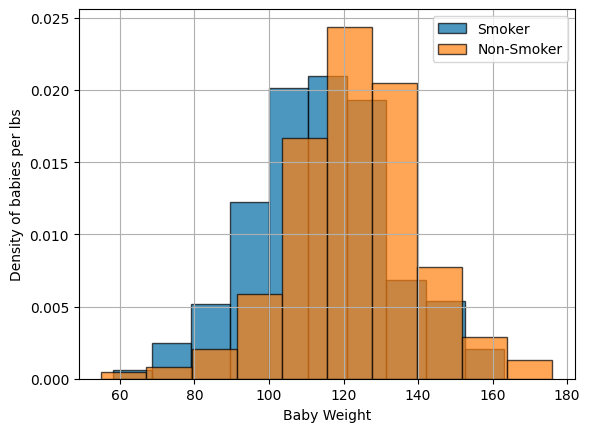

In [4]:
plt.hist(smoking_mothers['Birth Weight'], edgecolor='black', label='Smoker', density=True, alpha=0.7)
plt.hist(nonsmoking_mothers['Birth Weight'], edgecolor='black', label='Non-Smoker', density=True, alpha=0.7)
plt.legend()
plt.grid()
plt.xlabel("Baby Weight")
plt.ylabel("Density of babies per lbs")
plt.show()

In [5]:
baby.head(3)

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True


In [6]:
avg_bw_smoking = np.mean(smoking_mothers['Birth Weight'])
avg_bw_nonsmoking = np.mean(nonsmoking_mothers['Birth Weight'])

In [7]:
observed_statistic = avg_bw_smoking - avg_bw_nonsmoking
observed_statistic

np.float64(-9.266142572024918)

In [8]:
def calculate_statistic(dist1, dist2): # dist1 and dist2 are the distributions of the birth weight of smoking and non smoking mothers
    statistic = np.mean(dist1) - np.mean(dist2)
    return statistic

In [9]:
def one_simulation():
    shuffled_smoker = baby.sample(baby.shape[0], replace=False)['Maternal Smoker']
    shuffled_df = pd.DataFrame({'Maternal Smoker': shuffled_smoker.values,
                               'Birth Weight': baby['Birth Weight'].values})
    smoking = shuffled_df.query('`Maternal Smoker` == True')['Birth Weight']
    nonsmoking = shuffled_df.query('`Maternal Smoker` == False')['Birth Weight']
    statistic = calculate_statistic(smoking, nonsmoking)
    return statistic

In [10]:
one_simulation()

np.float64(-2.075868793515852)

In [11]:
repetitions = 20000
total_statistics = []


for _ in np.arange(repetitions):
    statistic = one_simulation()
    total_statistics.append(statistic)

total_statistics = np.array(total_statistics)

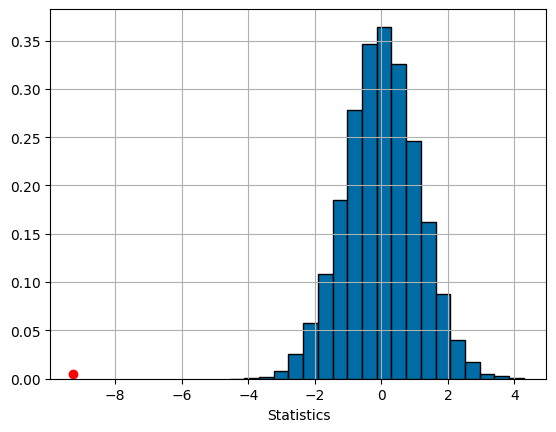

In [12]:
plt.hist(total_statistics, bins=20, density=True, edgecolor='black')
plt.scatter(observed_statistic, 0.005, color='red')
plt.grid()
plt.xlabel('Statistics')
plt.show()

In [13]:
p_value = np.sum(total_statistics <= observed_statistic) / repetitions
p_value

np.float64(0.0)